# Student Academic Performance Classification Model
### Samuel Mendez

In this notebook, I will analyze a Kaggle Dataset on student's academic performance. I will explore relationships between student's demographics, study habits, parental involvement, extracurricular activities, and academic performance. After EDA, I will build a machine-learning model to predict a student's GPA.

### Metadata
Student Information  
 
Target Variable: `Grade Class`  
- `GradeClass`: Classification of students' grades based on GPA:  
0: 'A' (GPA >= 3.5)  
1: 'B' (3.0 <= GPA < 3.5)  
2: 'C' (2.5 <= GPA < 3.0)  
3: 'D' (2.0 <= GPA < 2.5)  
4: 'F' (GPA < 2.0)  
* `StudentID`: A unique identifier assigned to each student (1001 to 3392).   
* `Age`: The age of the students ranges from 15 to 18 years.  
* `Gender`: Gender of the students, where 0 represents Male and 1 represents Female.  
* `Ethnicity`: The ethnicity of the students, coded as follows:  
0: Caucasian  
1: African American  
2: Asian  
3: Other  
* `ParentalEducation`: The education level of the parents, coded as follows:  
0: None  
1: High School  
2: Some College  
3: Bachelor's  
4: Higher  
* `StudyTimeWeekly`: Weekly study time in hours, ranging from 0 to 20.  
* `Absences`: Number of absences during the school year, ranging from 0 to 30.  
* `Tutoring`: Tutoring status, where 0 indicates No and 1 indicates Yes.   
* `ParentalSupport`: The level of parental support, is coded as follows:  
0: None  
1: Low  
2: Moderate  
3: High  
4: Very High   
* `Extracurricular`: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.  
* `Sports`: Participation in sports, where 0 indicates No and 1 indicates Yes.  
* `Music`: Participation in music activities, where 0 indicates No and 1 indicates Yes.  
* `Volunteering`: Participation in volunteering, where 0 indicates No and 1 indicates Yes.    
* `GPA`: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.nvolvement, and extracurricular activities.ties.

In [23]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2

import warnings

# suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data 
data = pd.read_csv('C:/Users/mende/Student_Performance_Classification/student_data.csv')

In [3]:
# verify imported data
data.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Exploratory Data Analysis

In [4]:
# let's look at the size of the data
data.shape

(2392, 15)

In [52]:
# check for duplicates
data.duplicated().sum()

0

The data is collected from 2,392 student samples and has 15 columns.

In [5]:
# descriptive statistics of the data
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Most students are within 1.25 years from the average age.  
The average GPA is 2.98.  
The average number of abscences is 14.5. Only 25% of students have missed 7 days or less.  
The average parental support for students is moderate.

In [6]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


We do not have any missing values in the data.

#### Data Visualization

Let's visualize the data to see how it is distributed and if there are any potential outliers in the data.

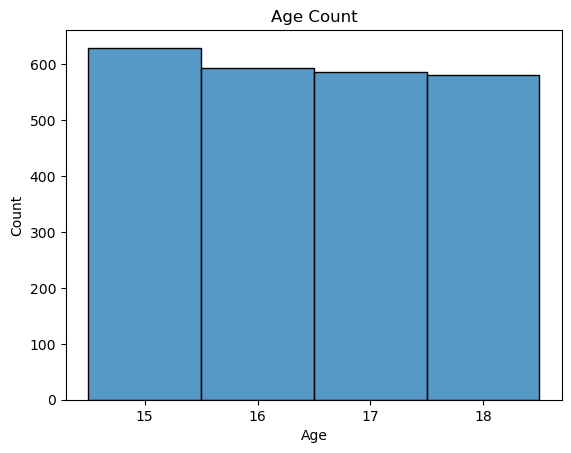

In [7]:
# view the age count of student age

sns.histplot(data['Age'], kde = False, discrete = True)
plt.title('Age Count')
plt.xticks(range(15,19))
plt.show()

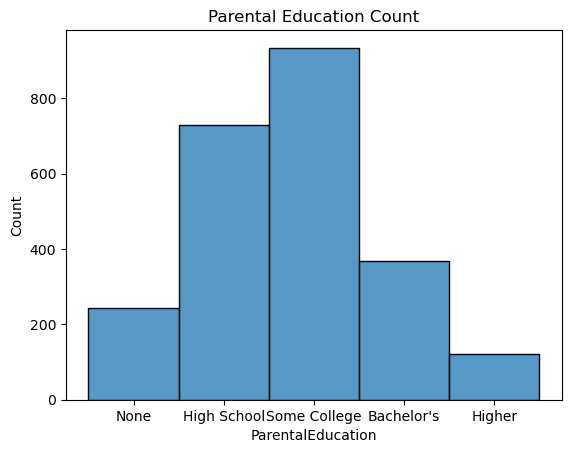

In [8]:
# view the parental education count
pe_labels = ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher']

sns.histplot(data['ParentalEducation'], kde = False, discrete = True)
plt.title('Parental Education Count')
plt.xticks(range(len(pe_labels)), labels=pe_labels)
plt.show()

The distribution among parents education level is normally distrubuted.

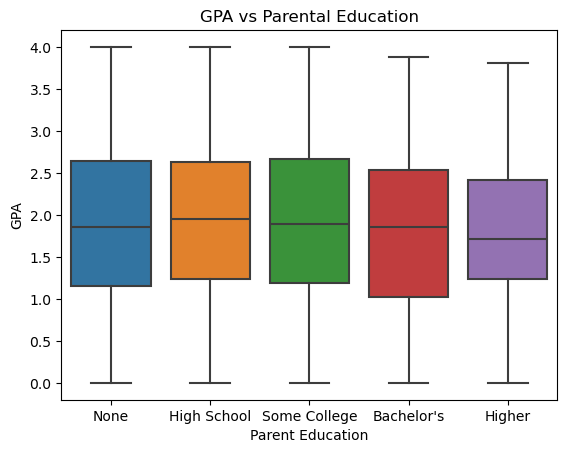

In [9]:
# lets see if there is a relationship between parent education level and student GPA

sns.boxplot(x='ParentalEducation', y='GPA', data=data)
plt.title('GPA vs Parental Education')
plt.xlabel('Parent Education')
plt.xticks(ticks=range(len(pe_labels)), labels=pe_labels)
plt.show()


Students whose parents who have higher education have the lowest median GPA but they also have the lowest variance.  

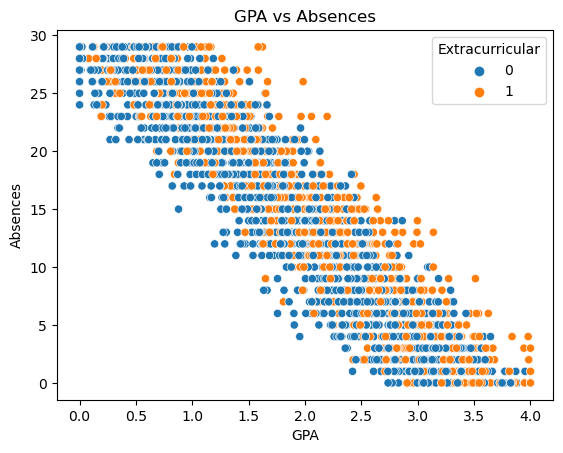

In [10]:
# let's see if there is any ralationship between GPA and Absences

sns.scatterplot(x='GPA', y='Absences', data=data, hue = 'Extracurricular')
plt.title('GPA vs Absences')
plt.show()

As expected, there is a clear linear correlation of student abscences and GPA.  
For each number of absences, students who have extracurricular activities tend to have higher GPAs.

In [13]:
data.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

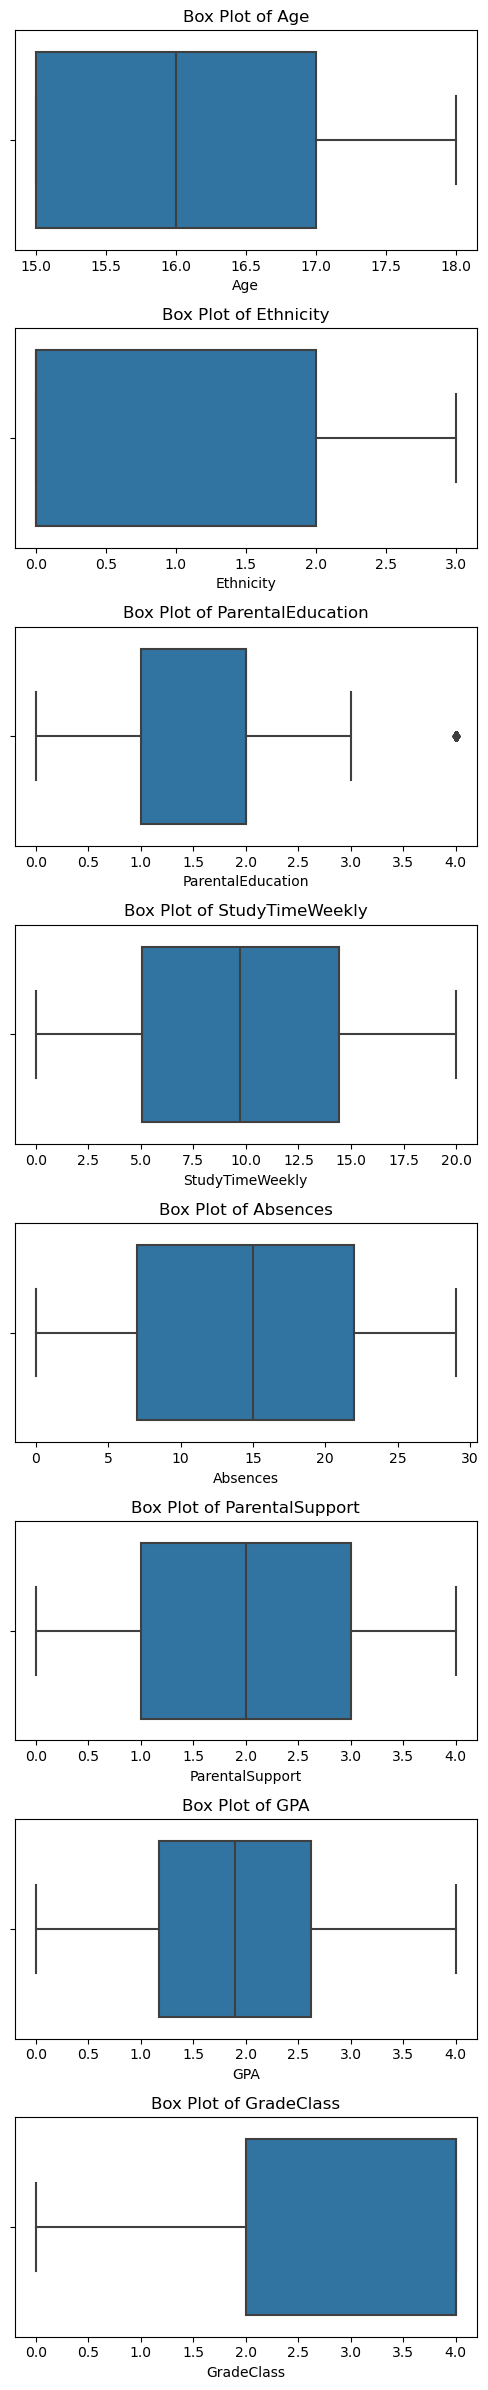

In [17]:
# let see if there are any outliers in the data

# create a figure with subplots
columns = ['Age', 'Ethnicity', 'ParentalEducation',
           'StudyTimeWeekly', 'Absences', 'ParentalSupport',
           'GPA','GradeClass']
reduced_data = data[columns]
num_columns = len(reduced_data.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(5, 3 * num_columns))

# if there's only one column, axes is not a list, so we need to handle it separately
if num_columns == 1:
    axes = [axes]

# create a box plot for each column
for i, column in enumerate(reduced_data.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

Parental Education is the only column that contains outliers. Parents with higher education are outliers in the data. 

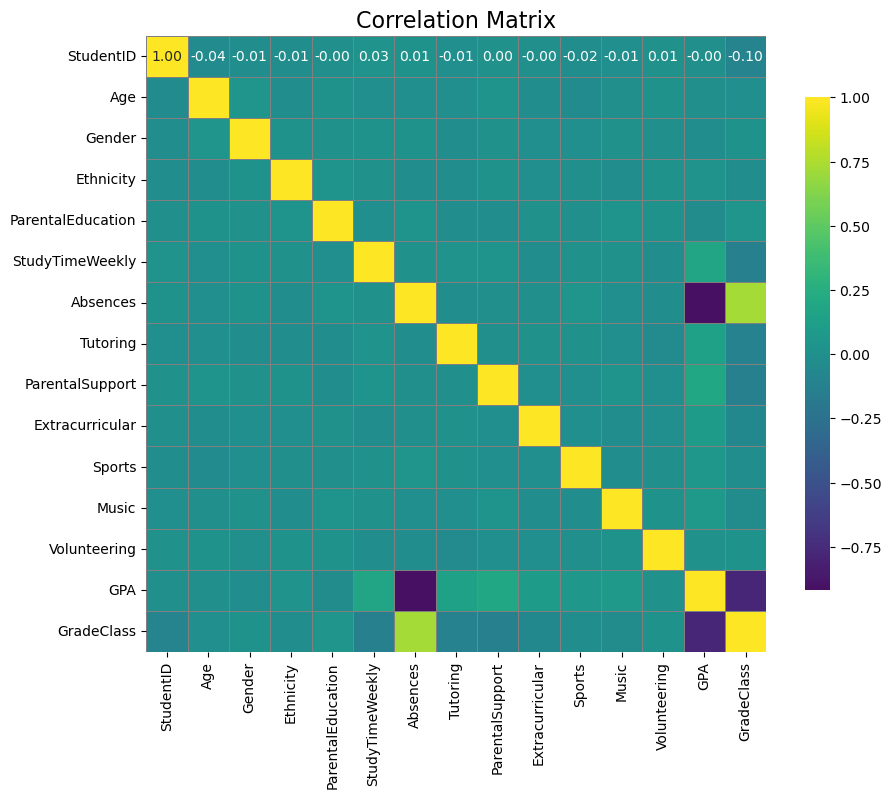

In [22]:
# lets see a correlation matrix of all of the columns
corr = data.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr,
    annot=True,               # Show the correlation coefficients
    cmap='viridis',          # Color map for the heatmap
    center=0,                 # Center the color map at zero
    linewidths=0.5,           # Width of the lines that divide cells
    linecolor='gray',         # Color of the lines that divide cells
    fmt='.2f',                # Format for the annotation text
    cbar_kws={"shrink": .8}   # Shrink the color bar
)

plt.title('Correlation Matrix')
plt.show()


`GPA` will evidently tell us `GradeClass` AND is almost perfectly negatively correlated so it will be dropped from the data. This will address potential multicollinearity issues with the model later in the project. The model will not assume linear relationships between the features.

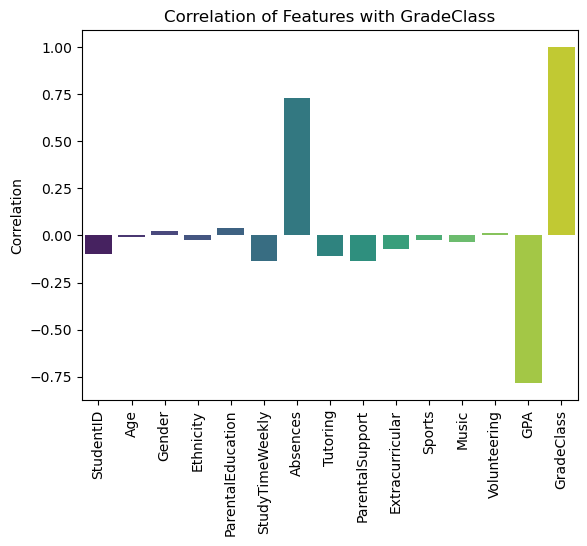

In [38]:
# lets compare feature importance
 
sns.barplot(x=corr['GradeClass'].index, y=corr['GradeClass'].values, palette='viridis')
plt.xticks(rotation=90)  # rotate x-axis labels for better readability
plt.ylabel('Correlation')
plt.title('Correlation of Features with GradeClass')
plt.show()

There is not significant correlations between `Music`, `Sports`, `Volunteering`, `Age` or `Gender` so they will be dropped features for the model. `StudentID` will also be dropped since it shouldn't have a relationship to `GradeClass`. 

### Data Preprocessing

In [74]:
# lets begin by creating a dataframe for features and target

# select features
cols_to_drop = ['GPA','Music','Volunteering','Sports','Age','Gender','StudentID','GradeClass']
features = data.drop(cols_to_drop, axis = 1)

# select target
target = data['GradeClass']

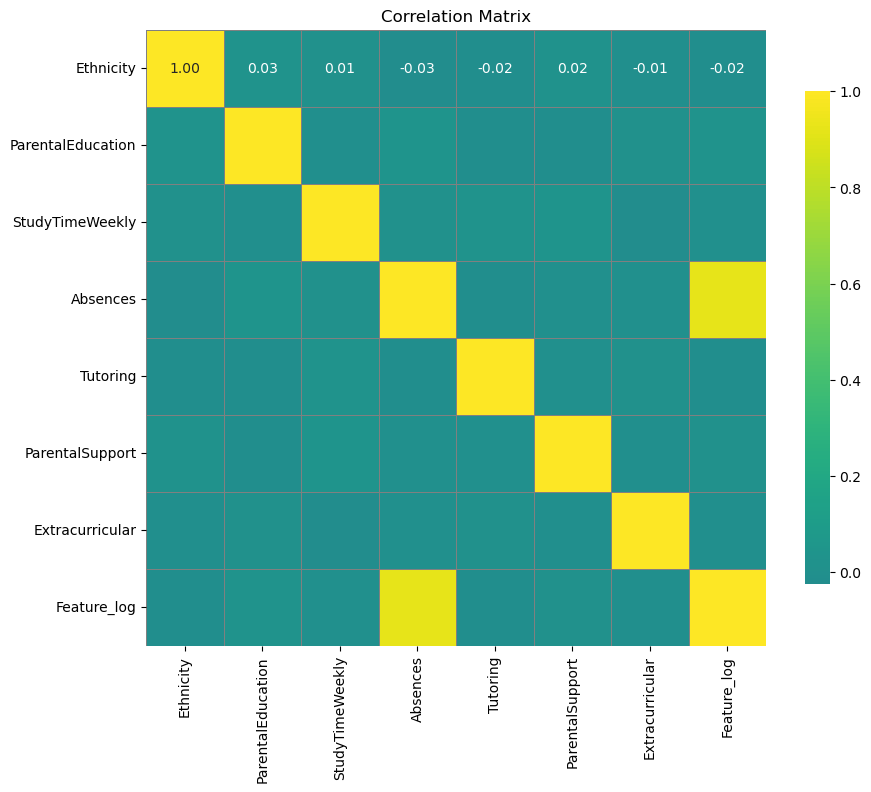

In [75]:
corr_features = features.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_features,
    annot=True,               # Show the correlation coefficients
    cmap='viridis',          # Color map for the heatmap
    center=0,                 # Center the color map at zero
    linewidths=0.5,           # Width of the lines that divide cells
    linecolor='gray',         # Color of the lines that divide cells
    fmt='.2f',                # Format for the annotation text
    cbar_kws={"shrink": .8}   # Shrink the color bar
)

plt.title('Correlation Matrix')
plt.show()

#### Scale Data

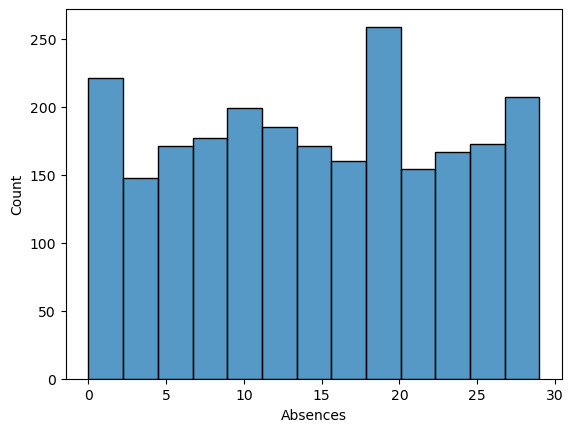

In [70]:
sns.histplot(features['Absences'])

plt.show()

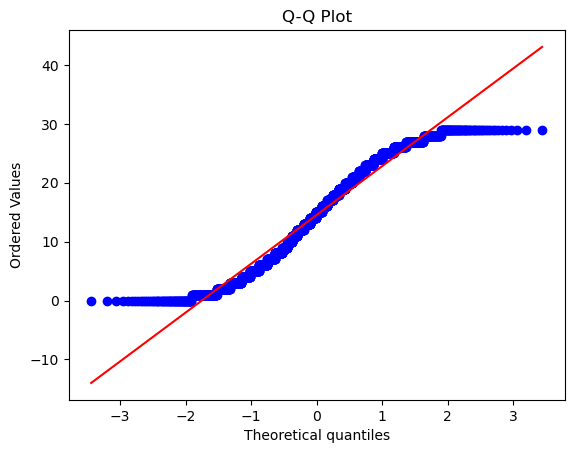

In [76]:
import scipy.stats as stats

stats.probplot(data['Absences'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [78]:
stat, p = stats.shapiro(data['Absences'])
print(f'Shapiro-Wilk Test: Stat={stat}, p={p}')

Shapiro-Wilk Test: Stat=0.9556750059127808, p=2.2756102591819377e-26


In [79]:
skewness = stats.skew(data['Absences'])
kurtosis = stats.kurtosis(data['Absences'])
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Skewness: -0.02600077249756051
Kurtosis: -1.1762755655561952
